In [8]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt

In [9]:
file = 'meta_Appliances.jsonl'

products = []

with open(file, 'r') as fp:
    for line in fp:
        products.append(json.loads(line.strip()))

In [10]:
# Subset all of the info to only include relevant fields
relevant_fields = ['title', 'rating_number', 'features', 'description']
products = [{field:product[field] for field in relevant_fields} for product in products]

# Combine features and description and remove unusual characters such as emojis.
for product in products:
    product['combined_description'] = re.sub(r'[^a-zA-Z0-9\s]', '', ' '.join(product['description'] + product['features'])).strip()

In [11]:
# Get the number of ratings for each product
num_ratings = []

for product in products:
    num_ratings.append(product['rating_number'])
    
num_ratings = np.array(num_ratings)

In [22]:
len(products)

94327

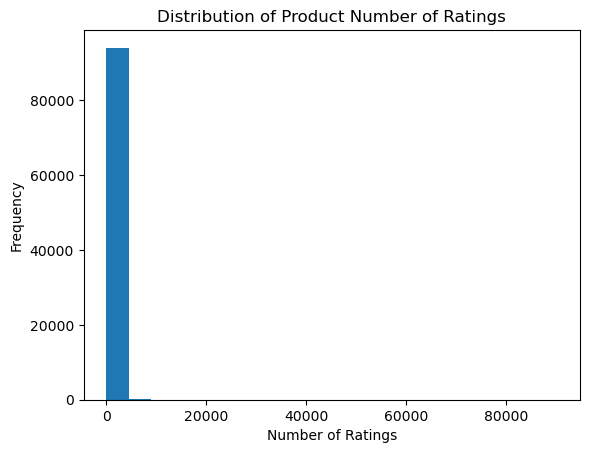

In [62]:
plt.hist(num_ratings, bins=20)
plt.title('Distribution of Product Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [82]:
sorted(num_ratings)[-10000]

198

In [84]:
ratings_threshold = 200 # PLEASE CHANGE THIS NUMBER
filtered_products = [product for product in products if product['rating_number'] > ratings_threshold]

print(f"There are now {len(filtered_products)} remaining products.")

There are now 9895 remaining products.


In [86]:
lengths = []
has_features = 0
has_description = 0

for product in filtered_products:
    lengths.append(len(product['combined_description']))
    if len(product['features']) > 0:
        has_features += 1
    
    if len(product['description']) > 0:
        has_description += 1
        
lengths = np.array(lengths)

In [88]:
print(f"Proportion of products with features: {has_features / len(filtered_products) * 100}")
print(f"Proportion of products with descriptions: {has_description / len(filtered_products) * 100}")

Proportion of products with features: 94.9166245578575
Proportion of products with descriptions: 52.00606366851945


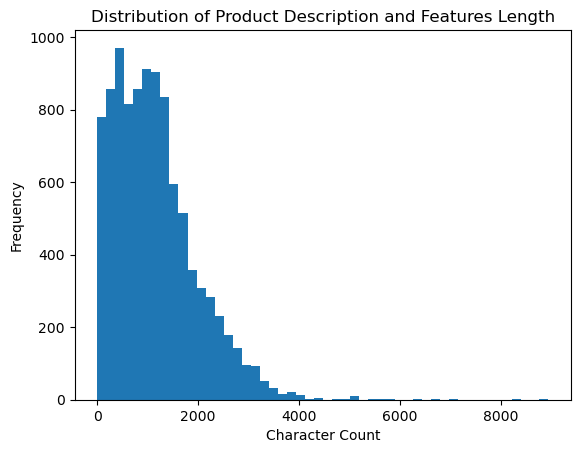

In [90]:
plt.hist(lengths, bins=50)
plt.title('Distribution of Product Description and Features Length')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

In [92]:
description_threshold = 500 

final_products = [product for product in filtered_products if len(product['combined_description']) > description_threshold]

print(f"There are now {len(final_products)} remaining products.")

There are now 7445 remaining products.
